In sentiment analysis, the main task is to identify opinion words, which is very important. Opinion words are dominant indicators of feelings, especially adjectives, adverbs, and verbs, for example: “I love this camera. It’s amazing!”

Opinion words are also known as polarity words, sentiment words, opinion lexicon, or opinion words, which can generally be divided into two types: positive words, for example, wonderful. , elegant, astonishing; and negative words, eg horrible, disgusting, poor.

## Basic library import and Project setup

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
train_path = r'C:/Users/asus/Documents/Myprojects/Sentiment-Analysis/sentiment data/Train.csv'
test_path = r'C:/Users/asus/Documents/Myprojects/Sentiment-Analysis/sentiment data/Test.csv'

In [13]:
train_data = pd.read_csv(train_path)

## Preprocessing libraries Import

In [14]:
import contractions
import re
from bs4 import BeautifulSoup
import string
import unicodedata
import nltk
from nltk.corpus import stopwords
stopword = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer

## Text Preprocessing
1. expanding contract words like "i'm superb" to "I am superb"
2. removing normalised accented words
3. remove @tags
4. changing abusive or * words to a word "starword".
5. remove http|https|ftp urls
6. get text from html tags
7. lowering characters
8. removing special symbols
9. word tokenizing text
10. lemmatize words

In [15]:
def text_preprocess_1(text):
    text = contractions.fix(text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')## Removing/normalising accented characters.
    text = re.sub(r' @[^\s]*',"",text)#Remove @elements
    #text = re.sub(r'RT[^A-Za-z]+',"",text)#Remove RT RETWEET tag
    text = re.sub(r'(([A-Za-z0-9._-]+)@([A-Za-z0-9._-]+)(\.)([A-Za-z]{2,8}))',"",text) #email
    text = re.sub(r'([A-Za-z0-9]+)(\*)+([A-Za-z0-9]+)','starword',text)# replacing ***words with "star_word"
    text = re.sub(r'((https|http|ftp)?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'," ",text) #urls
    text = BeautifulSoup(text, 'lxml').get_text(" ")#tag removal
    text = text.lower() #Lowering the characters
    text = re.sub(r'[^A-Za-z\s]', "", text)
    tokenize_text = word_tokenize(text)
    sentence = []
    for token in tokenize_text:
        if token not in stopword and len(token)>2:
            sentence.append(lemma.lemmatize(token))
            
    text = " ".join(sentence)
    
    '''updated_text = []
    for word in text.split():
        updated_word = ""
        for ch in word:
            if ch.isalpha() == True:
                if ch not in stopword:
                    updated_word = updated_word + ch
        updated_text.append(updated_word)
    text = " ".join(updated_text)'''
    
    
                
    #pattern = r'[^?/:;\"\'\s]'         '[a-z!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\s]'
    #text = re.sub(pattern, '', text)
    
    #emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',test_text)
    #text = re.sub('[\W]+',' ',test_text.lower()) +' '.join(emojis).replace('-','')
    return text

In [16]:
train_data['new_text'] = train_data['text'].apply(lambda text: text_preprocess_1(text))

In [8]:
train_data

,text,label,new_text
0,I grew up (b. 1965) watching and loving the Th...,0,grew watching loving thunderbird mate school w...
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chip expectation...
2,Why do people who do not know what a particula...,0,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,1,die hard dad army fan nothing ever change got ...
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,western union something forgotten classic west...
39996,This movie is an incredible piece of work. It ...,1,movie incredible piece work explores every noo...
39997,My wife and I watched this movie because we pl...,0,wife watched movie plan visit sicily stromboli...
39998,"When I first watched Flatliners, I was amazed....",1,first watched flatliners amazed necessary feat...


## Removing most common and least common words

In [17]:
def find_least_most_common_words(data, most_common, least_common):
    positivedata = data[data['label'] == 1]
    positivedata = positivedata['new_text']
    negdata = data[data['label'] == 0]
    negdata = negdata['new_text']
    
    pos_dist1 = FreqDist((" ".join(positivedata)).split())
    neg_dist1 = FreqDist((" ".join(negdata)).split())
    
    
    pos_common_keys = set(dict(pos_dist1.most_common()[:most_common]).keys())
    neg_common_keys = set(dict(neg_dist1.most_common()[:most_common]).keys())
    most_common_words = list(pos_common_keys.intersection(neg_common_keys))
    pos_least_common_words = list(dict(pos_dist1.most_common()[-least_common:]).keys())
    neg_least_common_words = list(dict(neg_dist1.most_common()[-least_common:]).keys())
    least_occured_words = pos_least_common_words + neg_least_common_words
    remove_words = most_common_words + least_occured_words
    
    
    return remove_words
    
removable_words = find_least_most_common_words(train_data,20,20)

In [18]:
def remove_common_words(text,remove_these_words):
    words = text.split()
    new_sentence = [word for word in words if word not in remove_these_words]
    text = " ".join(new_sentence)
    
    return text
    
train_data['final_text'] = train_data.new_text.apply(remove_common_words,remove_these_words = removable_words)

## Wordcloud

Positive words are as follows


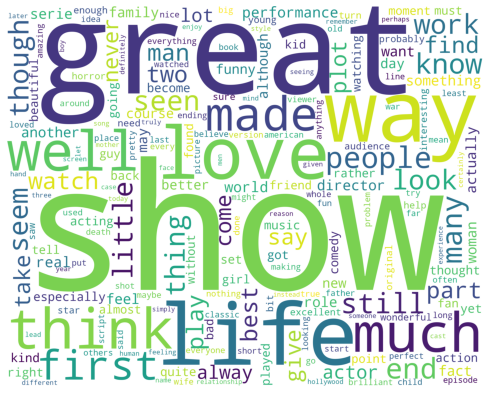

Negative words are as follows


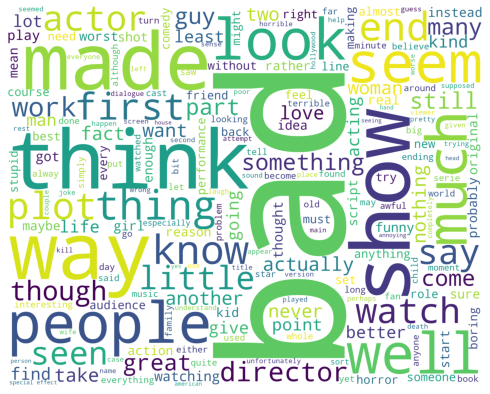

In [19]:
positivedata = train_data[train_data['label'] == 1]
positivedata = positivedata['final_text']
negdata = train_data[train_data['label'] == 0]
negdata = negdata['final_text']

from wordcloud import WordCloud

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

In [53]:
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y_train=train_data.label.values
x_train=tfidf_train.fit_transform(train_data.final_text)

In [54]:
test_data = pd.read_csv(test_path)

In [55]:
test_data['new_text'] = test_data['text'].apply(lambda text: text_preprocess_1(text))
test_data['final_text'] = test_data.new_text.apply(remove_common_words,remove_these_words = removable_words)

In [32]:
test_data

,text,label,new_text,final_text
0,I always wrote this series off as being a comp...,0,always wrote series complete stinkfest jim bel...,always wrote series complete stinkfest jim bel...
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,watched dirsteve purcell typical mary kate ash...,watched dirsteve purcell typical mary kate ash...
2,This movie was so poorly written and directed ...,0,movie poorly written directed fell asleep minu...,poorly written directed fell asleep minute jok...
3,The most interesting thing about Miryang (Secr...,1,interesting thing miryang secret sunshine acto...,interesting thing miryang secret sunshine acto...
4,"when i first read about ""berlin am meer"" i did...",0,first read berlin meer expect much thought rig...,first read berlin meer expect much thought rig...
...,...,...,...,...
4995,This is the kind of picture John Lassiter woul...,1,kind picture john lassiter would making today ...,kind picture john lassiter making today advanc...
4996,A MUST SEE! I saw WHIPPED at a press screening...,1,must see saw whipped press screening hilarious...,must saw whipped press screening hilarious tal...
4997,NBC should be ashamed. I wouldn't allow my chi...,0,nbc ashamed would allow child see definitely w...,nbc ashamed allow child definitely tell church...
4998,This movie is a clumsy mishmash of various gho...,0,movie clumsy mishmash various ghoststory suspe...,clumsy mishmash various ghoststory suspensethr...


In [56]:
#tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y_test=test_data.label.values
x_test=tfidf_train.transform(test_data.final_text)

In [50]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:  2.2min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  2.3min finished


## Testing

In [58]:
y_pred = clf.predict(x_test)
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8994
